In [227]:
#importing pandas and the file 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn.decomposition import PCA


In [228]:
class PCA:
 
    def __init__(self, n_components, x ):
        self.n_components = n_components
        self.x = x
      

            
    #standarize data 
    def pca (self):
        #standarized_data = StandardScaler().fit_transform(self.x)
        mean = np.mean(self.x, axis=0)
        
#(1). Do mean-centering.

        centered_data = self.x - mean
       
      
      #read the file in as a df and try to use df.cov

#(2). Compute the covariance matrix using numpy.cov().
 
        centered_data = self.x - mean
        cov_mat = np.cov(centered_data, rowvar=False)
       
        return cov_mat
    
    def eigen(self):
        cov_mat = self.pca()
        eigenvalues, eigenvectors = LA.eig(cov_mat)
       
        return  eigenvectors
    def values(self):
        cov_mat = self.pca()
        eigenvalues, eigenvectors = LA.eig(cov_mat)
        sorted_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalue = eigenvalues[sorted_index]
        sorted_eigenvectors = eigenvectors[:, sorted_index]
     
        return  sorted_eigenvalue
    def sort_eigenvector(self):
        cov_mat = self.pca()
        eigenvalues, eigenvectors = LA.eig(cov_mat)
        sorted_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalue = eigenvalues[sorted_index]
        sorted_eigenvectors = eigenvectors[:, sorted_index]
        

        return sorted_eigenvectors 
        
    def projection(self):
        eigenvectors = self.sort_eigenvector()
        project_data = np.dot(self.x, eigenvectors)
        return project_data
        
    
    def score_plot(self):
        project_data = self.projection()
        #score plot
        PC1 = project_data[:, 0]
        PC2 = project_data[:, 1]
       
        plt.scatter(PC1, PC2)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA Scores Plot')
        plt.show()
    def loading_plot(self):
        eigenvectors = self.eigen()
        num_of_variables = self.x.shape[1]
        variable_names = self.x.columns.values
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(eigenvectors[0,: ], eigenvectors[1, :],
                color='blue')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_title('loadings plot')

        for i in range(num_of_variables):
            ax.text(eigenvectors[0, i], eigenvectors[1, i], variable_names[i])
        fig.show()
        
    def scree_plot(self):
        sorted_eigenvalues = self.values()
    
        variance_explained = (sorted_eigenvalues / sum(sorted_eigenvalues))*100
        print("Variance explained:")
        print(variance_explained)
           
        plt.scatter(range(2),variance_explained[0:2])
        #plt.scatter(variance_explained, variance_explained, color='blue')
        plt.title('scree plot')
        plt.xlabel('PC index')
        plt.ylabel('percent variance explained')
        
        
   
        
    def project_pc1(self):
        PC = self.sort_eigenvector()
        x= self.x.iloc[:,0]
        y= self.x.iloc[:,1]
        fig, ax = plt.subplots()
        ax.scatter(x,y, color='blue')
        ax.plot([0, -20*PC[0, 0]], [0, -20*PC[1, 0]], color='red', linewidth=3, label='PC 1')
        ax.plot([0, -20 * PC[0, 1]], [0, -20 *PC[1, 1]], color='green', linewidth=3, label='PC 2')
        ax.set_title('raw data and PC axis')
        ax.set_aspect('equal', 'box')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.legend()
        
      
       
   
        
        
        
  


   

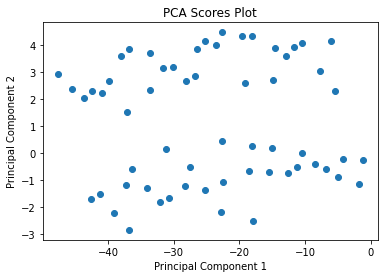

Variance explained:
[96.91556417  3.08443583]


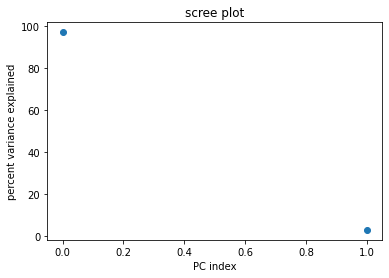

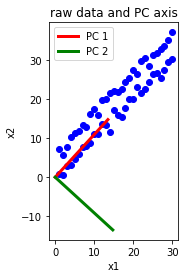

In [229]:
prob3_data =pd.read_csv("/Users/lisaricanek/Downloads/Homework_2_dataset_prob3.csv")
#newdf = prob3_data.transpose()
#x = newdf.to_numpy()
r = PCA(2,prob3_data)
r.pca()
r.eigen()
#r.values()
#r.projection()
r.score_plot()
r.scree_plot()
r.project_pc1()


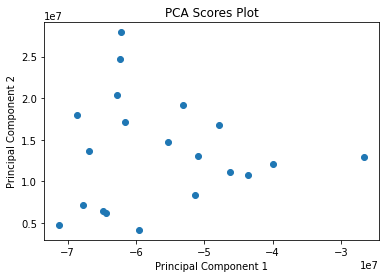

/var/folders/5t/bh7r62w13c7b9b4c_q6xv13c0000gn/T/ipykernel_11908/330280664.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


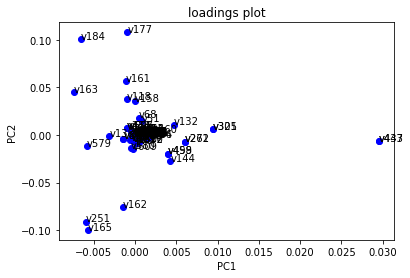

In [231]:
prob4_data =pd.read_csv("/Users/lisaricanek/Downloads/Homework_2_dataset_prob4.csv", index_col = 0)
newdf = prob4_data.transpose()
#x = newdf.to_numpy()
r = PCA(2,newdf)
# r.pca()
#r.eigen()
#r.values()
#r.projection()
r.score_plot()
r.loading_plot()





Variance explained:
[99.42991304  0.57008696]


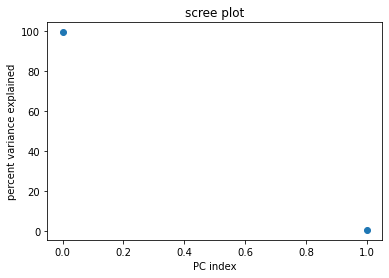

In [215]:
prob4_data =pd.read_csv("/Users/lisaricanek/Downloads/Homework_2_dataset_prob4.csv", index_col = 0)
newdf = prob4_data.transpose()
x = newdf.loc[:,['v1','v5']]
r = PCA(2,x)
r.pca()
#r.eigen()
#r.values()
#r.projection()
r.scree_plot()


